In [18]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import random
import time

In [19]:
img = cv2.imread('D:\deep-learning\images\cat.jpg')
type(img)

numpy.ndarray

In [20]:
img.shape

(183, 275, 3)

In [21]:
cv2.imshow('cat', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
def read_pictures(**kwargs):
    img = cv2.imread(kwargs['pictures'])
    if img is None:
        raise IOError('檔名出錯 or 無此圖片檔案')
    '''
    try:
        cv2.imshow(kwargs['pictures'], img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except IOError:
        print("圖片輸出錯誤")
    '''
    return img

In [27]:
def read_directory(**kwargs):
    array_of_img = []
    for filename in os.listdir(r"./" + kwargs['directory_name']):
        img = cv2.imread(kwargs['directory_name'] + "/" + filename)
        if img is None:
            pass
        else:
            print('filename: ', filename, 'img: ', img)
            print(img.shape)
            array_of_img.append(img)
    return np.array(array_of_img)

In [81]:
def display_one(a, title1 = "Original"):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def display_two(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    plt.show()
    
def processing(data):
    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    
    print('Original size', img.shape)
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    #for i in range(len(img)):
    res = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    res_img.append(res)
        
    print("RESIZED", res.shape)
    resized = res
    display_two(data, resized)

In [89]:
def blur(data):
    no_noise = []
    #for i in range(len(data)):
    blur = cv2.GaussianBlur(data, (5, 5), 0)
    image = blur
    display_two(data, image, 'Original', 'Blured')

In [92]:
#def main():
## 1. read data
image = read_pictures(pictures = 'D:\deep-learning\images\cat.jpg')

Original size (183, 275, 3)
RESIZED (220, 220, 3)


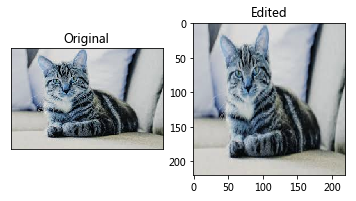

In [93]:
## 2. resize data
processing(image)

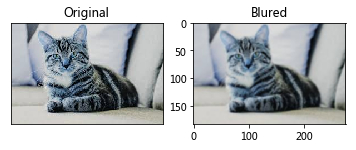

In [94]:
## 3. blur data
blur(image)

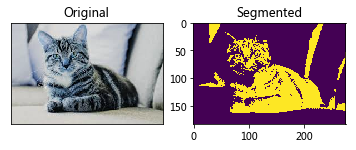

In [97]:
## 4.1 segmantation and morphology data
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

display_two(image, thresh, 'Original', 'Segmented')

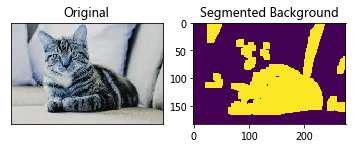

In [99]:
## 4.2 need further enhancement, use another blur to improve with following code:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

display_two(image, sure_bg, 'Original', 'Segmented Background')


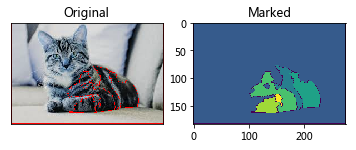

In [101]:
## 4.3 seperate different objects in the image with markers
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
display_two(image, markers, 'Original', 'Marked')